<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height:300px">
    <div style="margin: 5px; padding: 10px;">
    <h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h5 style="color:#C0C0C0">LMU, summer 2016</h5>
    <h4 style="color:rgba(0,0,0,0.6)">Stefanie Donner, Céline Hadziioannou, Ceri Nunn</h4>
    </div>
    <div style="float:right; margin: 20px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 100px">
        <div style="position:relative; top:40%; transform: translateY(-50%)">
        <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P2.4 - Final exam report</div>
        </div>
    </div>
   
</div>

### Ameya Prabhu (11427697)

## Rules + deadline

In the following you find five exercises plus some basic code. Adapt the code as needed to answer the questions and provide your answers in separate markdown cells below the exercise. Please, do not forget to label axes, lines, titles, etc in your plots.  
Make sure that your answers are as elaborate and detailed as necessary to make your answer clear. However, concentrate on the essentials. 

In case you refer to literature/sources outside the course material, do not forget to acknowledge or cite them properly. You are also allowed to include images from outside the notebook if that may help you to explain. In that case, do not forget to provide us with the image files then. This is how you import figures in markdown: 

`<img style="float: left; height: 350px; padding: 10px" src="DATA/figure.jpg"/>`

For help with coding, please, consult the official [Python](http://docs.python.org/) and [ObsPy](http://docs.obspy.org) documentation. For help in formating the markdown cells, you can find help e.g. at the webpage of [wikipedia](https://en.wikipedia.org/wiki/Markdown) or on the [cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). In case of severe problems, please contact us in time.

Submit your final notebook via mail to Stefanie Donner (donner@geophysik.uni-muenchen.de) at the latest 

### August 5th, 23:55 !!!

Notebooks received after that time will not be considered.

*Please, do not forget to execute Cell 0 first!*

<br>
<br>

In [3]:
# Cell 0: Preparation for programming
%pylab inline
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import wave
import struct
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['lines.linewidth'] = 1

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


______________

## Exercise 1

In this exercise you will work on broadband data from the Mw8.2 Chile earthquake from 1st of April 2014 at 23:46:47 UTC recorded at the black forest station in SW Germany (BFO). The goal of this exercise is to show your understanding of the principal basics in signal processing. Answer the following questions and perform the necessary steps in the corresponding code cells.

a) In cell 1a you fetch the waveforms via the FDSN client of IRIS and remove the instrument characteristic of the data (no further coding necessary here). Explain what "removing the instrument response" means and why it is necessary. Which mathematical method do you connect with this step? What is to consider during instrument response removal? A hint is given by the options used for removing the instrument response. Comment on all of them.

b) Now that you have downloaded the data and removed the instrument response, which further steps do you need to perform for pre-processing? Assume that for your scientific task the highest frequency you want to analyse is 5Hz. Describe the general pre-processing chain and point out the possible pitfalls and how to avoid them. Among others, some steps are high-pass filtering and demean as well as detrend the trace. Why do you do so?

c) Bonus _(Optional, for extra points)_: Try to plot the ray paths for this special earthquake receiver pair. Identify which phases should be theoretically visible in the seismogram. Try to identify them. 

3 Trace(s) in Stream:
II.BFO.00.BHE | 2014-04-01T23:30:00.019500Z - 2014-04-02T02:29:59.969500Z | 20.0 Hz, 216000 samples
II.BFO.00.BHN | 2014-04-01T23:30:00.019500Z - 2014-04-02T02:29:59.969500Z | 20.0 Hz, 216000 samples
II.BFO.00.BHZ | 2014-04-01T23:30:00.019500Z - 2014-04-02T02:29:59.969500Z | 20.0 Hz, 216000 samples


II.BFO.00.BHZ | 2014-04-01T23:30:00.019500Z - 2014-04-02T02:29:59.969500Z | 20.0 Hz, 216000 samples

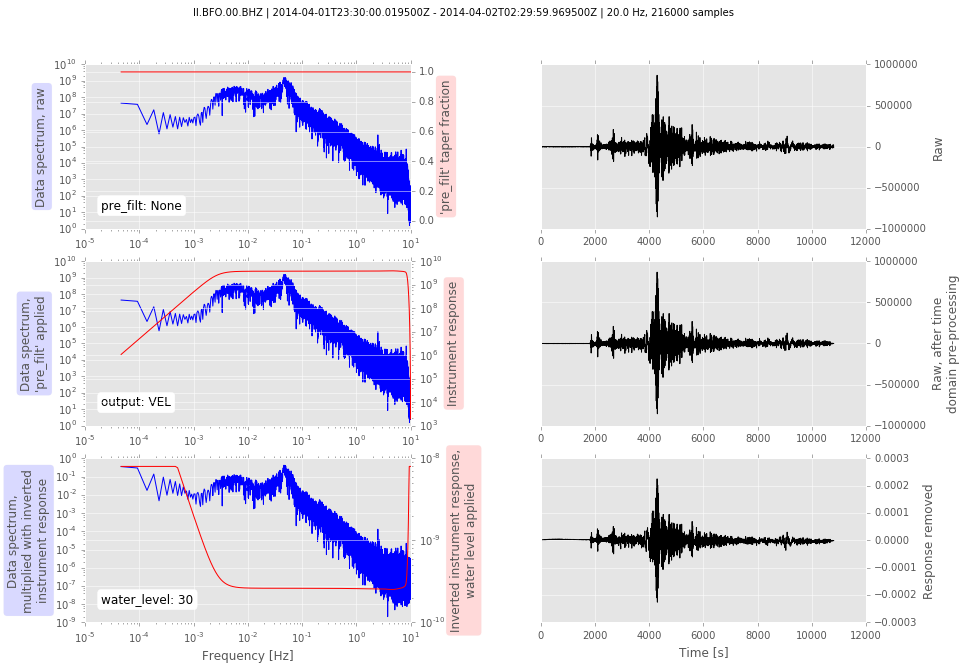

In [22]:
# Cell 1a : getting the waveforms

client = Client("IRIS")
t = UTCDateTime("2014-04-01T23:30:0.0")

st = client.get_waveforms("II", "BFO", "*", "BH?", t, t+(180*60), attach_response=True)
print(st)
st[0].remove_response(output="VEL", pre_filt=None, water_level=30, zero_mean=True, taper=True, taper_fraction=0.05, 
                   plot=False)
st[1].remove_response(output="VEL", pre_filt=None, water_level=30, zero_mean=True, taper=True, taper_fraction=0.05, 
                   plot=False)
st[2].remove_response(output="VEL", pre_filt=None, water_level=30, zero_mean=True, taper=True, taper_fraction=0.05, 
                   plot=True)

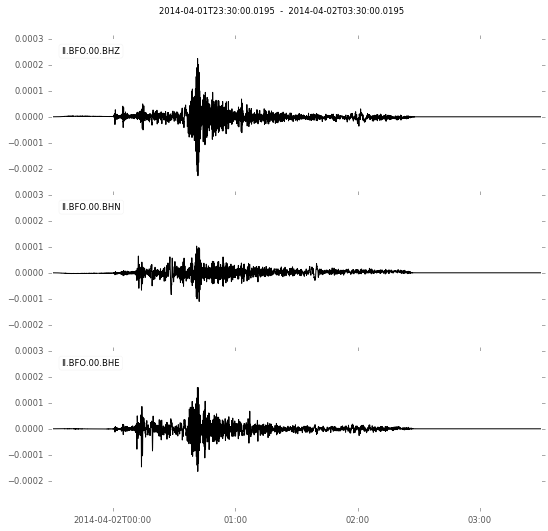

In [23]:
# Cell 1b: pre-processing the data

# take a copy of the stream to avoid overwriting the original data
bfo = st.copy()

#detrending the trace
bfo.detrend()
#tapering the trace
bfo.taper(max_percentage = 0.05)

#Here the sampling frequency was 20Hz, I downsampled it by a factor of 2. Giving me a sampling rate of 10Hz.
#therefore my nyquist is now 5Hz. Therefore I should use a lowpass filter to not keep any frequencies in my
#signal higher than 5Hz. This also accomplishes my specific scientific task, where the highest frequency I want
# to analyse is 5Hz.
bfo.filter("lowpass", freq = 5.0)

#downsampling 
bfo.decimate(2, strict_length = False, no_filter = True)

#trimming for zero padding 
bfo.trim(t,t+(240*60),pad = True, fill_value = 0)

#plotting the trace
bfo.plot()






Station BFO (Black Forest Observatory, Schiltach, Germany)
	Station Code: BFO
	Channel Count: 0/123 (Selected/Total)
	1996-05-29T00:00:00.000000Z - 2599-12-31T23:59:59.000000Z
	Access: open 
	Latitude: 48.33, Longitude: 8.33, Elevation: 589.0 m
	Available Channels:



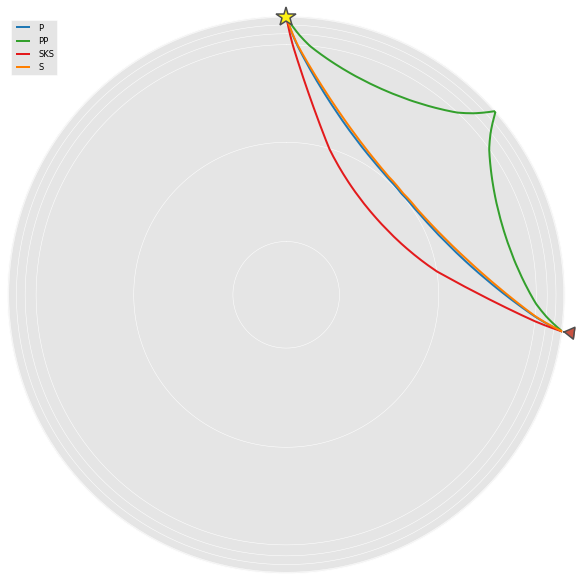

4 arrivals
	P phase arrival at 811.987 seconds
	PP phase arrival at 1049.569 seconds
	SKS phase arrival at 1447.509 seconds
	S phase arrival at 1495.386 seconds


In [26]:
# Cell 1c - part 1: plot of ray pathes for this EQ-receiver pair

# loading the necessary package as a hint ...
from obspy.taup import TauPyModel
#to get the distance in degrees
from obspy.geodetics import locations2degrees
#to get the catalog of the event
catalog = client.get_events(starttime=t , endtime = t + (180*60), minmagnitude = 8, includeallorigins = True)

#to get the lat, long and depth of the event to use the lat, long to calculate the distance in degrees,
#and the depth to get arrivals using TauPy
#print(catalog[0].origins)

#getting inventory from client
inventory = client.get_stations(network = "II",station= "BFO")
#getting network from inventory
net = inventory[0]
#getting station from network
sta = net[0]
#printing to get lat, long of receiver
print(sta)
#to ge distance in degrees between the source and receiver
dist = locations2degrees(-19.6097,-70.7691,48.33,8.33)


#plotting the raypaths
model = TauPyModel(model="iasp91")
#for all phases
#arrivals = model.get_ray_paths(source_depth_in_km=25, distance_in_degree=dist)
#arrivals.plot() 
#getting arrival times for selected phases for plotting on the seismogram
#print(arrivals)
arrivals = model.get_ray_paths(source_depth_in_km=25, distance_in_degree=dist,phase_list = ['P','PP','SKS','S'])
arrivals.plot() 
#getting arrival times
print(arrivals)



144001


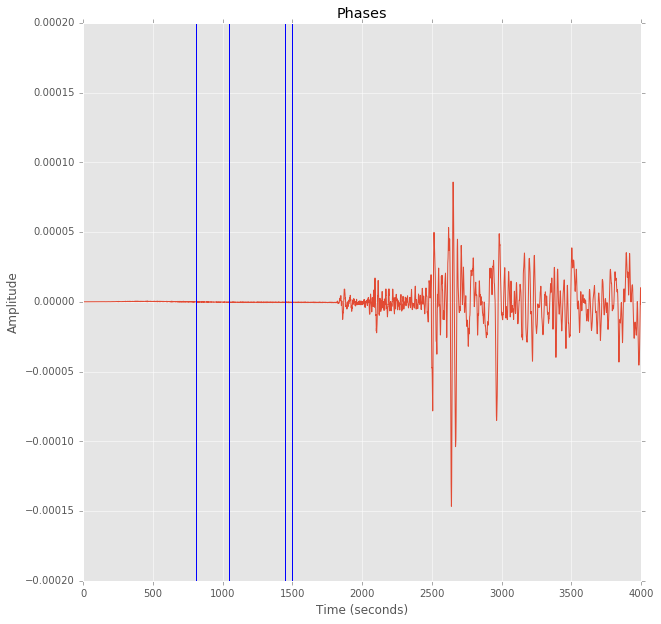

In [55]:
# Cell 1c - part 2: plot seismogram with theoretical travel times

# loading the necessary package as a hint ...
from matplotlib.pyplot import cm
print((len(bfo[0]))) #to check length of time axis

t1 = np.linspace(0,((len(bfo[0]))/10),144001)
#print(len(t1))
plt.plot(t1,bfo[0])


plt.xlim([0,4000])
plt.title('Phases')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

rem = ['P','PP','SKS','S']
#phases in the order written above
for i in range(0,len(arrivals)):
    plt.axvline(arrivals[i].time)
   



### Answer to exercise 1
### 1)a)
#### What removing the instrument response means - 
We use the seismometer to measure the ground motions from the Earthquake source. The seismometer is a means of measuring these original ground motions, however in that process, the output that we get from a seismometer is a convolution of the signal from the ground motions and the instruments own effects. The instrumentation introduces distortion, and scaling of the data and therefore must be removed from the raw data (that is **"removing the instrument response"**) before the actual ground motion can be accurately represented. By removing the instrument response, it is not that we can represent the ground motions accurately, we are only trying to separate the effects of the instrument on the signal, there might be additional filtering we might have to do to get the more accurate representation of the ground motions. It is necessary to remove the instrument response, since you are interested in the source.

#### Which mathematical method do you connect with this step -
Deconvolution is what you use to remove the instruments response. Deconvolution in the time domain is division in the frequency domain. We are diving by the instruments response in the frequency domain. To avoid dividing by zero or values close to zero, we replace the denominator with a fraction of the maximum value for all frequencies. Therefore this fraction/ratio is the water level we set and is therefore represented in decibels (since it is a ratio). The water level represents a clipping of the inverse spectrum and limits amplification to a certain maximum cut-off value. We can set this water level, by trial and error, as a sort of tradeoff between avoiding dividing by zero and not trying to get rid of too much information.

<img style="float: left; height: 350px; padding: 10px" src="data/water.jpg"/>                                            

*reference for the image - http://eqseis.geosc.psu.edu/~cammon/HTML/RftnDocs/seq01.html*

The plot we see here are various stages of the parameters we use for removing the response, for example we see the pre_filt stage, where we have set it to none, so it doesn't apply a filter. 

* Output - converts from digital counts to units of velocity (m/sec). 
* pre_filt - Applies a bandpass filter in frequency domain to the data before deconvolution, however here we have set it to "none". waterlevel - Water level for deconvolution, sets the aforementioned waterlevel in decibels. 
* zero_mean - If True, which it is here, subtracts the mean of the waveform data in time domain prior to deconvolution. taper - applies a cosine taper  to the waveform data in time domain prior to deconvolution, when set to true. 
* taper_fraction - Taper fraction of cosine taper to use. 
* plot - If True, brings up a plot of the various steps of preprocessing we asked it to do. First by pre_filt frequency domain tapering, then by inverting the instrument response spectrum with or without water_level and finally showing data with inverted instrument response multiplied on it in frequency domain. It also shows the comparison of raw/corrected data in time domain.

### 1)b)
In a general setting, one would start off with filtering the analog data to avoid aliasing. After removing the instrument response, one would want to resample the data, downsample it in case of large data sets. While doing this we would have to be careful while setting the sampling frequency, since it decides the nyquist frequency. Setting the nyquist too low, might lead to certain frequencies in the signal being larger than the nyquist frequency and can lead to say ghost frequecies showing up in your fourier transform.


Then we choose the appropriate window length in the time domain, for the event we want to look at, and remove the other data which is not of interest to our specific goal. Demean the data, is subtracting the mean value from the data. If there is a possible offset which we wish to get rid of, we employ demean. To separate any linear trends from the data, we would also like to detrend to data as well. After having separated the relevant window, we would like to taper the data at the egdes of the window to avoid gibbs phenomenon due to abrupt discontinuities. We also do zero padding, since it does not add anything to your frequency spectrum, but increases your frequncy resolution by increasing the length of the signal(that is the number of samples N). Then we can either perform FFT(fast fourier transform) or some form of spectral analysis depending on the task at hand. If we are looking at high frequency signals, we use a high pass filter to remove the low frequency components from our signal (tides might be a possible source for these low frequency signals which we wish to remove).




_____________
## Exercise 2 : Marienplatz Glockenspiel - spectral analysis

In the very top of the tower of the New Town Hall (Rathaus) on Marienplatz, there are 43 bells, which chime different tunes daily at 11am and 12am. The tunes accompany a spectacle of figurines that move and illustrate local stories.  
In this exercise, we will analyze a recording of the Glockenspiel bells. 

You can read more about the Glockenspiel here: https://en.wikipedia.org/wiki/Rathaus-Glockenspiel

You can listen to the first tune of the Glockenspiel recording by playing `data/Glockenspiel_Marienplatz_track1.wav`  


---

<img style="float: left; height: 350px; padding: 10px" src="data/rathaus_munchen.jpg"  />
<img style="float: right; height: 350px; padding: 10px" src="data/glockenspiel_inside.jpg"  />


###### Acknowledgement
_photo Rathaus (left): _ https://commons.wikimedia.org/wiki/File:Altes_Rathaus_und_Mariens%C3%A4ule_in_M%C3%BCnchen.jpg  
_photo inside Glockenspiel (right): Thies Heidecke_  
_We are grateful to the personnell at the Rathaus for providing access to the Glockenspiel tower._  
_We thank Thies Heidecke for his help with the recording. _

In [4]:
# Cell 2a-1 - Read in the .wav file

# read in the file 
dataDir = './data/'
fileName = 'Glockenspiel_Marienplatz_track1.wav'
# if your computer cannot handle the complete tune, use this file instead (only first 15 seconds)
#fileName = 'Glockenspiel_Marienplatz_track1_short.wav'

stream = wave.open(dataDir + fileName,'r')

# get the details about the .wav file
num_channels = stream.getnchannels()
frame_rate = stream.getframerate()     # sampling rate
sample_width = stream.getsampwidth()   
num_frames = stream.getnframes()      # number of points
total_samples = num_frames * num_channels
endtime = float(total_samples) / float(frame_rate)

# read the byte data
raw_data = stream.readframes( num_frames )
stream.close()

# check the type of audio track
if sample_width == 1: 
    fmt = "%iB" % total_samples # read unsigned chars
elif sample_width == 2:
    fmt = "%ih" % total_samples # read signed 2 byte shorts
else:
    raise ValueError("Only supports 8 and 16 bit audio formats.")

# unpack the byte data to integers
integer_data = struct.unpack(fmt, raw_data)

# Keep memory tidy
del raw_data

# set up the channel
channels = [ [] for time in range(num_channels) ]

# read the integers to channels
for index, value in enumerate(integer_data):
    bucket = index % num_channels    
    channels[bucket].append(value)
    
# signal and timeseries arrays:
gsignal = channels[0]
time = np.linspace(0,endtime,total_samples)  # in seconds

print('Number of samples in the signal:', len(gsignal))    

Number of samples in the signal: 3969000


1 Trace(s) in Stream:
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:01:29.999977Z | 44100.0 Hz, 3969000 samples


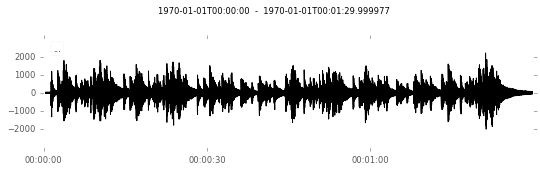

In [5]:
# Cell 2a-2 - read .wav into obspy Stream object

st = read(dataDir + fileName)
print(st)
st.plot()

# just the signal array and time vector
gsignal_st = st[0].data
time_st = st[0].times()

In the previous two cells, the glockenspiel tune has been read in two different ways:

+ `gsignal` is a numpy array with the signal values. Associated time vector is 'time'; sampling rate is in the variables 'frame_rate'
+ `st` is an obspy stream object with the same glockenspiel tune. You can manipulate it in the same way as other stream objects in previous practicals. 

Both contain the same signal, so you can use whichever one is easiest in the following exercise. 

### Questions - part 1

**Note:** if the signal is too large for your computer to handle, use the alternative, shorter signal which contains only the first 15 seconds of the tune. See Cell 2a, where the filename is defined. 

Create several subplots: plot the signal on top, and below that create two subplots: in the first, plot the spectrogram using a window length of 256 samples. 
In the second, plot the spectrogram with a window length of 4096 samples. In both, use an overlap of 50. 

a) Explain what a spectrogram (in general) represents. Through which mathematical operation is the y-axis (frequency axis) created? What controls the value of the upper limit of the y-axis?

b) Compare the spectrograms with `NFFT=256` and `NFFT=4096`. What difference between the two do you notice? Think in terms of time and frequency resolution. Explain why this happens.  
Remember you can zoom in to specific parts of the signal by manipulating the plot limits 
(`plt.xlim((value1, value2))` or `plt.ylim((value1, value2))`) 

c) On both spectrograms, zoom in to frequency around 6780 Hz using `plt.ylim((value1, value2))` . This frequency corresponds to one of the bells. Isolate the signal of this bell as much as you can using a filter.  
Go to Cell 2c. In a new plot, plot the original (unfiltered) signal and the filtered signal on top of each other with different colors. How often does the 6780Hz bell ring in the first 10 seconds of the song? (You may want to trim the signal to the first 10 seconds first). 

d) If you plot a spectrogram of the filtered signal, you will see that the energy of the signal outside your filter band is not exactly zero. What is this effect called?  
Explain how you could achieve a narrower filter (you do not need to execute it for this signal, just describe). What kind of tradeoff will you encounter as you use a narrower filter window? 



In [3]:
# Cell 2b - compare spectograms

NFFT = 256     
NFFT2 = 4096   
noverlap = 50  
noverlap2 = 50 
               

plot_freq_min = 6760       # the lower frequency bound in Hz
plot_freq_max = 6790     # the upper frequency bound in Hz

# x axis limits in the plot, in seconds
xstart = 0
xend = 90

# make a time series 
time = np.linspace(0,endtime,total_samples)  # in seconds

plt.figure(figsize=(15,12))

ax1 = plt.subplot(311)
plt.plot(time, channels[0], 'k', label="Glockenspeil", lw=1)
plt.legend()
plt.title('Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# plt.ylim((plot_freq_min, plot_freq_max))
plt.subplot(312, sharex=ax1)
plt.title('spectrogram, window length %s pts' % NFFT)

Pxx, freqs, bins, im = plt.specgram(channels[0], NFFT=NFFT, Fs=frame_rate, noverlap=noverlap,
                                cmap=cm.jet,sides='onesided')


plt.ylabel('frequency [Hz]')
plt.xlabel('time [s]')
#plt.ylim(plot_freq_min,plot_freq_max)

plt.subplot(313, sharex=ax1)
plt.title('spectrogram, window length %s pts' % NFFT2)

Pxx, freqs, bins, im = plt.specgram(channels[0], NFFT=NFFT2, Fs=frame_rate, noverlap=noverlap2,
                                cmap=cm.jet,sides='onesided')
plt.ylim((plot_freq_min, plot_freq_max))
plt.ylabel('frequency [Hz]')
plt.xlabel('time [s]')
plt.xlim((xstart, xend))
#plt.ylim(plot_freq_min,plot_freq_max)

# prevent subplots overlapping
plt.tight_layout() 

plt.show()





NameError: name 'np' is not defined

### Answer to exercise 2 - part 1/1


#### a) Explain what a spectrogram (in general) represents. Through which mathematical operation is the y-axis (frequency axis) created? What controls the value of the upper limit of the y-axis?
A spectogram is a plot with the time on the x axis and the frequency on the y axis. It is built from a sequence of spectra, with by stacking the spectra in time, and representing the corresponding amplitude of the frequencies using a colour scale, where red is high and blue is low. Therefore for a particular dt(window length), it represents the corresponding frequencies in the signal, with the colour representing the amplitude of the respective frequencies.

The y-axis is created by doing a fast fourier transform in this case, or maybe a fourier transform generally. The nyquist frequency sets the limit of the maxima of the y axis, for example with the smaller time window length, smaller dt we have a high nyquist frequency compared to a larger window length, higher dt (hence smaller nyquist). Therefore we can see that for window length of 256 the y axis has a higher maxima than for a window length of 4096.

#### b) Compare the spectrograms with NFFT=256 and NFFT=4096. What difference between the two do you notice? Think in terms of time and frequency resolution. Explain why this happens.
On comparing the two spectrograms you can see that the one with the window lenght as 256, the individuals notes are sharper but the frequency resolution is not so good anymore. However for the window length of 4096, you can see that the individual notes are less easily visible, but the harmonics of the Glockenspeil are much sharper. This happens dur to a tradeoff between the time and frequency domain, like the uncertainity principle.
<img style="float: left; height: 350px; padding: 10px" src="data/fis.jpg"/>

One can also relate it to, Δf = 1/NΔT. Therefore increasing N will reduce Δf, thus making the frequency resolution finer.




NameError: name 'stb' is not defined

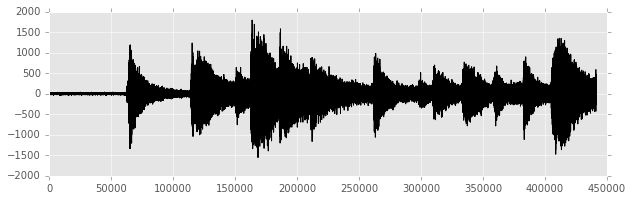

In [6]:
# Cell 2c - isolate single bell
f_bell = 6780
stf = st.copy()
#filtering (bandpass)
stf.filter('bandpass', freqmin=f_bell-50, freqmax=f_bell+50) 
# triming the signals
st.trim(starttime=st[0].stats.starttime,endtime=UTCDateTime("1970-01-01T00:00:10.000000Z")) 
stf.trim(starttime=st[0].stats.starttime,endtime=UTCDateTime("1970-01-01T00:00:10.000000Z"))
plt.subplot(311)
plt.plot(st[0],'k',label='original',zorder=1)
plt.plot(stb[0],'r',label='filtered',zorder=2)
plt.title('Original and Filtered song')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()


#plot the spectrogram of the filtered signal
plt.subplot(312)
Pxx, freqs, bins, im = plt.specgram(stf[0], NFFT=NFFT2, Fs=frame_rate, noverlap=noverlap2,
                                 cmap=cm.jet,sides='onesided')
plt.title('spectrogram, window length %s pts' % NFFT2)
plt.ylabel('frequency [Hz]')
plt.xlabel('time [s]')
plt.xlim((0, 10))

plt.subplot(313)
Pxx, freqs, bins, im = plt.specgram(stf[0], NFFT=NFFT, Fs=frame_rate, noverlap=noverlap2,
                                 cmap=cm.jet,sides='onesided')
plt.title('spectrogram, window length %s pts' % NFFT)
plt.ylabel('frequency [Hz]')
plt.xlabel('time [s]')
plt.xlim((0, 10))




### Answer to exercise 2 - part 1/2


#### c)How often does the 6780Hz bell ring in the first 10 seconds of the song? (You may want to trim the signal to the first 10 seconds first).
The bell rings 4 times in the first 10 seconds, the bell corresponding to 6780Hz

#### d) If you plot a spectrogram of the filtered signal, you will see that the energy of the signal outside your filter band is not exactly zero. What is this effect called? Explain how you could achieve a narrower filter (you do not need to execute it for this signal, just describe). What kind of tradeoff will you encounter as you use a narrower filter window?

The effect is called spectral leakage, its creating new frequency components (the finite length of our data causes spectral leakage). It adding the sidelobes in the frequency domanin, which were not present, resulting in us seeing the energy outside of the filter band. One can achieve a narrower filter by widening the time window of our sample, as widening the physical signal narrows in frequency domain. However abrupt discontinuities at the end of our window leads to gibbs phenomenon and thus these side lobes which in turn is spectral leakage. 
Therefore we need to taper the window as well appropriately. Therefore this gives rise to a tradeoff between resolution in the frequency domain (width of the peak) and the spectral leakage (amplitude of the sidelobes).
We can see in the that using [rectangular window](https://upload.wikimedia.org/wikipedia/commons/6/6a/Window_function_and_frequency_response_-_Rectangular.svg) (click link) gives finer peak but high amplitude of side lobes. Whereas a [Hann window](https://upload.wikimedia.org/wikipedia/commons/b/b3/Window_function_and_frequency_response_-_Hann.svg)  will give a relatively wider peak but less amplitude of side lobes.

### Questions - part 2

In the following Cell 2d, we consider part of the spectral content of a single bell chime. The spectrum is calculated for several different lengths of time window:  
1. the complete bell chime (approx. 0.8 seconds)
2. a short time window (500 samples)
3. a longer time window (3000 samples)
4. the longer time window, with the rest of the signal set to zero (so 3000 samples + zero padding to complete signal length) (**Note:** in the first plot, the blue signal is offset downwards by 500 points. This is just to make the difference between green and blue line more visible. ) 

Explain the difference between the spectra obtained with the different time window lengths. 
In particular, consider why the peak around f=3750Hz does not show up when using the shortest time window (red line). Why is the blue spectrum smoother than the green one? 



1 Trace(s) in Stream:
... | 1970-01-01T00:00:09.100000Z - 1970-01-01T00:00:09.900000Z | 44100.0 Hz, 35281 samples


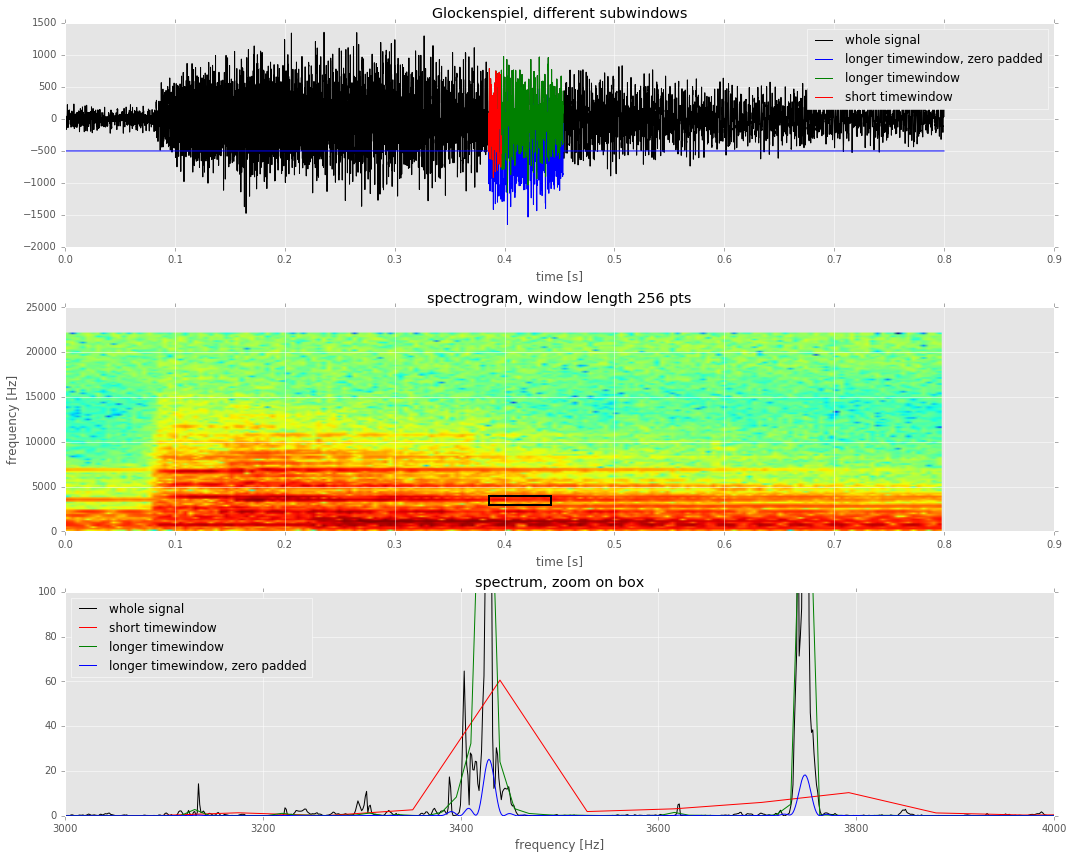

In [22]:
-

### Answer to exercise 2 - part 2

#### Explain the difference between the spectra obtained with the different time window lengths. In particular, consider why the peak around f=3750Hz does not show up when using the shortest time window (red line). Why is the blue spectrum smoother than the green one?
We are changing the number of samples with different time windows. Δf = 1/NΔT. We are changing the N here. Therefore for a short time window with 500 as N, the Δf is much larger than in the case of the green one with 3000 samples has a finer Δf and the one with zero padding has a even finer Δf due to the zero padding. Therefore we get  different spectra for the different time windows. The blue one has a smaller Δf than the green. Therefore the spctrum that we see for the green one is made of step sizes much larger than that of the blue. Therefore the blue spectrum is made of more points hence is smoother than the green one. We can see the difference by changing the plotting parameters to 'go' and 'bo' while plotting the spectrums and we can see green has lesser dots than blue does. Therefore blue is smoother than green.

For the red spectrum, N is the smallest, therefore its Δf is the largest. I can think of two reasons for the peak at 3750 does not show up, either that the peak does not call on the bins, the bin size being so large. If we change the plotting parameters to 'or' again we can see that the 2 red dots are spaced around the peak. The other reason I can think of is that we are taking a very small time window, and plotting its spectrum. Maybe that freqeuncy component of 3750Hz is not contained in that particular time window that we choose.

_______________________

## Exercise 3

This question is about convolution of signals. You are provided with two signals. 

a) What is a convolution? Convolution is closely connected to a special kind of system. Which one? Describe the connection. <br> 
Using [signal.convolve](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) convolve the two signals in Cell 3a. Set the mode='same'. Explain the meaning of the mode parameter. <br>
Plot the original signals and the convolved signal. Be careful to plot the entire signal on both the x and y axes. Include labels.  

b) In cell 3b, replace one of signals with a new signal that has a different shape. Convolve the signals and plot them again. Are convolutions commutative? 

c) In cell 3c, convolve the signals win and sig in the reverse order, continuing to use mode='same'. Replot. <br>
Are the results the same or different from cell 2a? Explain this result. Explain any inconsistencies.

d) Bonus _(optional for extra points)_: Amend the signals so that convolving them in the reverse order gives the same result as convolving them in original order. 

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


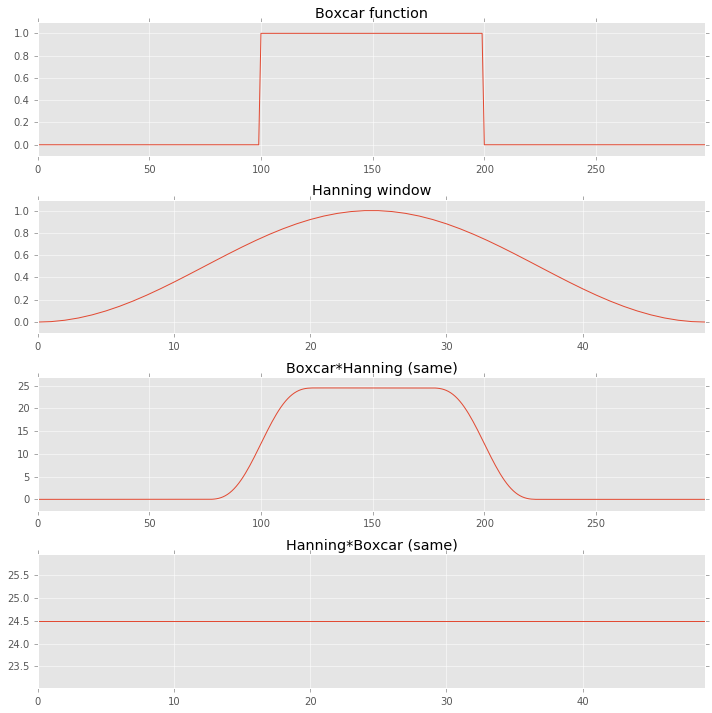

In [7]:
#Cell 3a - convolving two signals + plotting

# make a box car function
box = np.repeat([0., 1., 0.], 100)
# make a Hann window 
win = signal.hann(50)

# convolve the signals
filtered = signal.convolve(box, win, mode='same') 
filtered_2 = signal.convolve(win, box, mode='same') 
fig, (ax_orig, ax_win, ax_filt,ax_filt_2) = plt.subplots(4, 1)
ax_orig.plot(box)
ax_orig.set_title('Boxcar function')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Hanning window')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Boxcar*Hanning (same)')
ax_filt.margins(0, 0.1)
ax_filt_2.plot(filtered_2)
ax_filt_2.set_title('Hanning*Boxcar (same)')
ax_filt_2.margins(0, 0.1)
fig.tight_layout()
fig.show()



/Users/Ameya/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


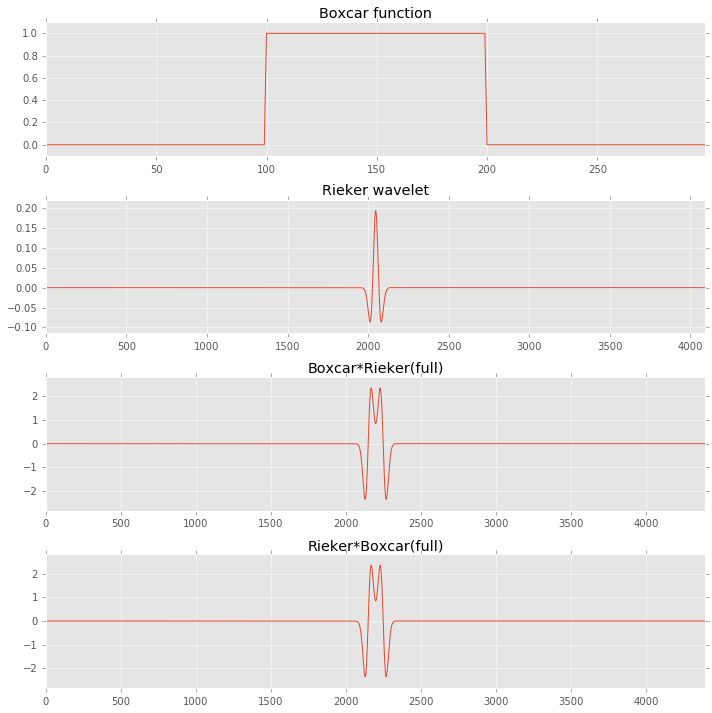

In [11]:
# Cell 3b - change one signal, convolve both signals + plotting
npts = 4096  
# make a box car function
sig = np.repeat([0., 1., 0.], 100)

# Rieker wavelet
rk = signal.ricker(npts, 20.0) 
# convolve the signals
filtered = signal.convolve(sig, rk, mode='full') 
filtered_2 = signal.convolve(rk, sig, mode='full') 
fig, (ax_orig, ax_win, ax_filt, ax_filt_2) = plt.subplots(4, 1)
ax_orig.plot(sig)
ax_orig.set_title('Boxcar function')
ax_orig.margins(0, 0.1)
ax_win.plot(rk)
ax_win.set_title('Rieker wavelet')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Boxcar*Rieker(full)')
ax_filt.margins(0, 0.1)
ax_filt_2.plot(filtered_2)
ax_filt_2.set_title('Rieker*Boxcar(full)')
ax_filt_2.margins(0, 0.1)
fig.tight_layout()
fig.show()




/Users/Ameya/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


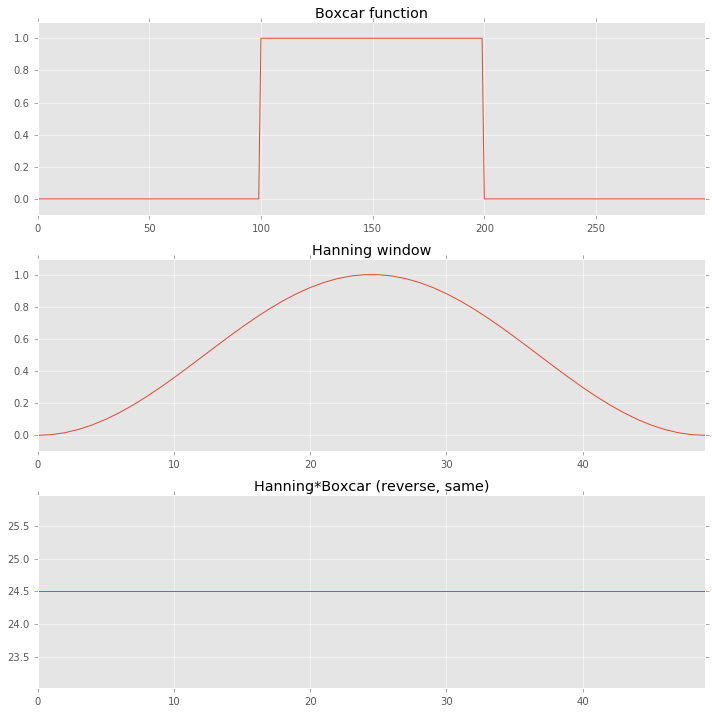

In [12]:
# Cell 3c - convolution in reverse order + plotting

# make a box car function
sig = np.repeat([0., 1., 0.], 100)
# make a Hann window 
win = signal.hann(50)
# convolve the signals

filtered = signal.convolve(win,sig, mode='same') 
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1)
ax_orig.plot(sig)
ax_orig.set_title('Boxcar function')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Hanning window')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Hanning*Boxcar (reverse, same)')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()






/Users/Ameya/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


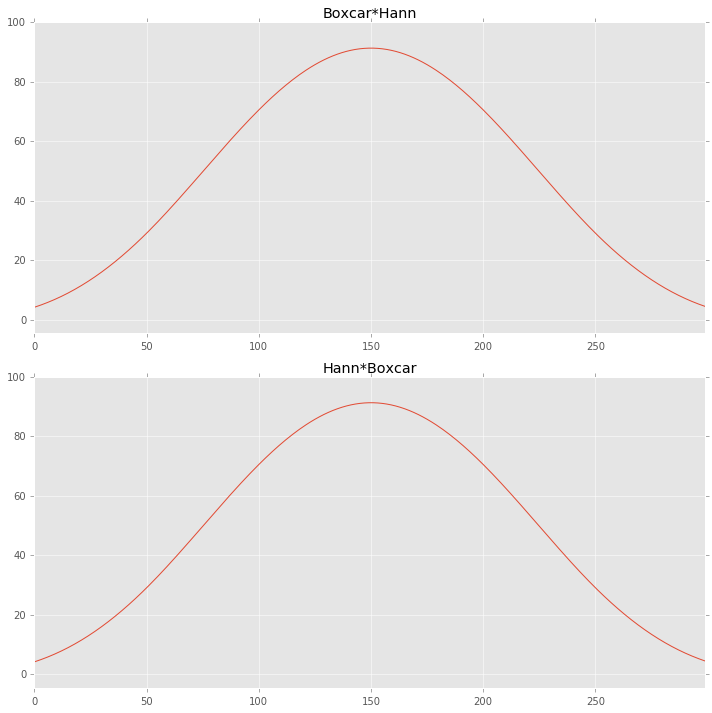

In [8]:
# Cell 3d - amend signals and convolve again (bonus)

# make a box car function
sig = np.repeat([0., 1., 0.], 100)
# make a Hann window 
win = signal.hann(300)
# convolve the signals

filtered = signal.convolve(win,sig, mode='same')
filtered_1 = signal.convolve(sig,win, mode='same') 

fig, (ax_win, ax_filt) = plt.subplots(2, 1)
ax_win.plot(filtered_1)
ax_win.set_title('Boxcar*Hann (same)')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Hann*Boxcar (same)')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()




### Answer to exercise 3

#### a) What is a convolution? Convolution is closely connected to a special kind of system. Which one? Describe the connection. 
Convolution is a mathematical operation on two functions ; it produces a third function, giving the integral of the pointwise multiplication of the two functions as a function of the amount that one of the original functions is translated. In other words if we are doing a convolution of two functions f and g, the convolution is an integral that expresses the amount of overlap of one function g as it is shifted over another function f.

Convolution is closely related to linear time invariant (LTI) systems. The input-output behavior of an LTI system can be characterized via its impulse response, and the output of an LTI system for any input signal x(t) can be expressed as the convolution of the input signal with the system's impulse response.

Mode is a parameter that indicates the size of the output, we give the signal.convolve two inputs in1 and in2, in part a) they are the boxcar = in1 which is an array 300 in length and hann which is 50 in length. Therefore setting mode= same will limit my output to the size of my in1, that is 300. But if would have set the mode = full the output would have been 350.

#### b) Convolve the signals and plot them again. Are convolutions commutative?
Yeah, convolutions are commutative if done fully. Here keeping mode = same, is limiting the output to the size of the first input in1, therefore might not get commutative results.

#### c) Are the results the same or different from cell 2a? Explain this result. Explain any inconsistencies.
The result is different from that of 3)a since on mode=same its limiting the output to the size of in1, which in this case is Hann, with a smaller size. In this context, in1 should be larger than in2 if we are using arrays of different sizes. But here in1=hann is smaller than in2= boxcar, therefore for mode=same, its only adding zeros with zeros at the discrete points. Changing the mode to full will give us a commutative output.

#### d) Bonus (optional for extra points): Amend the signals so that convolving them in the reverse order gives the same result as convolving them in original order.
Increased the size of hanning to match that of boxcar, and plotted the convolution both ways to show commutativity.


__________________

## Exercise 4


In Cell 4a theoretical gravity data, modeled for the ringlaser location in Wettzell, are loaded. The data show a superposition of tidal effects due to different celestial bodies. Here is a short overview of the most important ones, sorted according the amplitude of their influence on Earth:
+ tides with a period of half a day from sun, moon, Mars, Jupiter, etc. ..., period: 
+ tides with a period of one day from sun, moon, Mars, Jupiter, etc. ..., period: 
+ cycle of the orbit of the moon, period: 28 days
+ equinox - sun and moon passing the equator plane, period: 186 days (about every six months)
+ Chandler wobble (deviation of Earth's axis of rotation relative to the solid Earth), period: 433 days
+ effects due to further planets ....


a) In Cell 4b, calculate the spectrum of the data and plot it (as a log-log plot). Try to identify the different tidal effects and name the frequencies of their peak positions. Why is the peak for the Chandler wobble not really visible in the spectrogram? 
Hint: To calculate the spectrum, you can use the function [periodogram](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html) of the scipy.signal package.

b) In Cell 4c, try to separate the tides with periods of half and full day from the other tidal effects by filtering. Which filter do you choose and why? Plot the filtered signal for about the first 28 days.  
Explain what happens behind the screens when applying a filter to data (in mathematical sense). 

c) Now, isolate the half day and full day tides separately from each other and from the rest of the data. Which filter do you choose this time and why? Plot the filtered signal for about the first 25 days on top of the filtered data from exercise 1b.  
How can a filter be defined, in terms of responses? There are mainly three different keywords. Describe them. Why do we need three instead of only one definition?


1 Trace(s) in Stream:
XX.WETZ..XZ | 2015-01-01T00:00:00.000000Z - 2015-12-30T23:00:00.000000Z | 3600.0 s, 8736 samples
         network: XX
         station: WETZ
        location: 
         channel: XZ
       starttime: 2015-01-01T00:00:00.000000Z
         endtime: 2015-12-30T23:00:00.000000Z
   sampling_rate: 0.0002777777777777778
           delta: 3600.0
            npts: 8736
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'encoding': 'FLOAT32', 'number_of_records': 9, 'record_length': 4096, 'byteorder': '>', 'filesize': 36864})


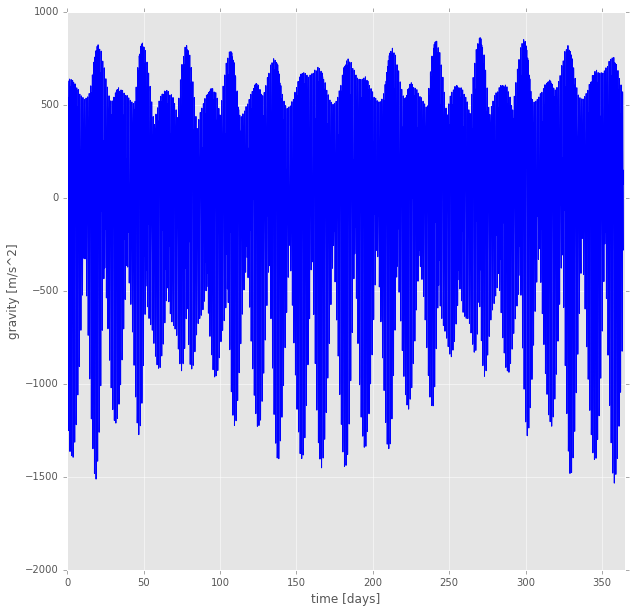

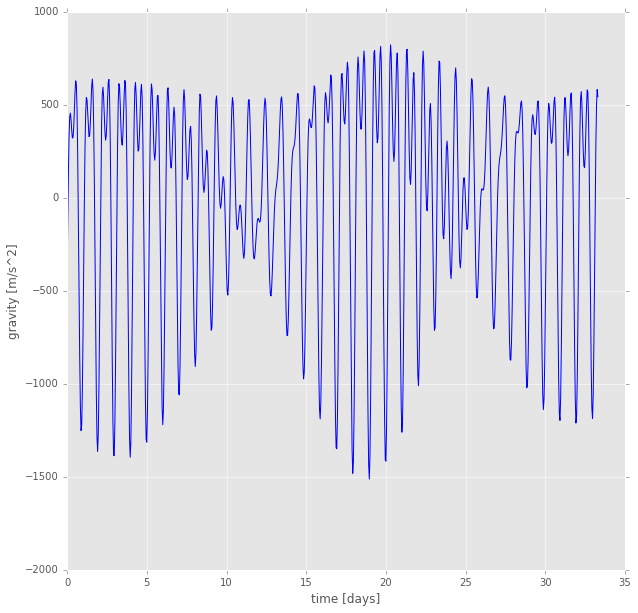

In [21]:
# Cell 4a - reading and plotting gravity data

# read in gravity data, modeled for Wettzell, Germany. Units is in nm/s^2 vertical acceleration. 
filename = 'data/gravity.dat'

# prepare to input data into obspy Stream
data = np.loadtxt(filename, dtype='float32', comments="#")
stats = {'network': 'XX', 'station': 'WETZ', 'location': '',
         'channel': 'XZ', 'npts': len(data), 'delta': 3600}

stats['starttime'] = UTCDateTime("2015,01,01,00,00,00")
s = Stream([Trace(data=data, header=stats)])

# write as MSEED file
s.write("gravity.mseed", format='MSEED')

# test that it worked, read stream from file and plot
st = read("gravity.mseed")
print(st)
print(st[0].stats)
#st.plot()

plt.plot(st[0].times()/(3600*24), st[0].data, color='b')
plt.xlim(0,365)
plt.xlabel("time [days]")
plt.ylabel("gravity [m/s^2]")
plt.show()

# zoom into first 35 days
plt.plot(st[0].times()[0:800]/(3600*24), st[0].data[0:800], color='b')
plt.xlabel("time [days]")
plt.ylabel("gravity [m/s^2]")
plt.show()

[2.3148148148148147e-05, 1.1574074074074073e-05, 4.133597883597884e-07, 6.222620469932298e-08]


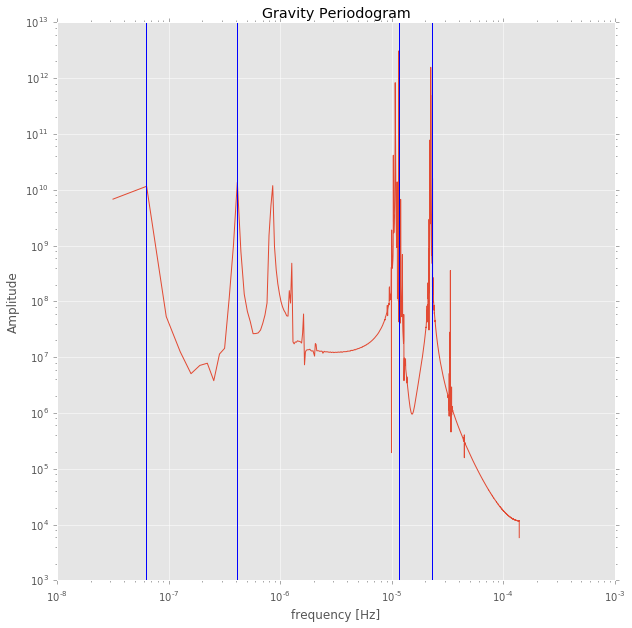

In [52]:
# Cell 4b - calculate spectrum
tides = [0.5,1,28,186]
fre = []

for i in tides:
    i = i* 24.*60.*60.
    y = 1./i
    fre.append(y)
print(fre)
    

#print([0,len(fre)])
fs = 0.0002777777777777778
f, Pxx_den = signal.periodogram(st[0], fs)
plt.loglog(f, Pxx_den)

for i in fre:
    plt.axvline(i)
    
plt.title('Gravity Periodogram')
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude')
plt.ylim([10**3,10**13])
plt.show()




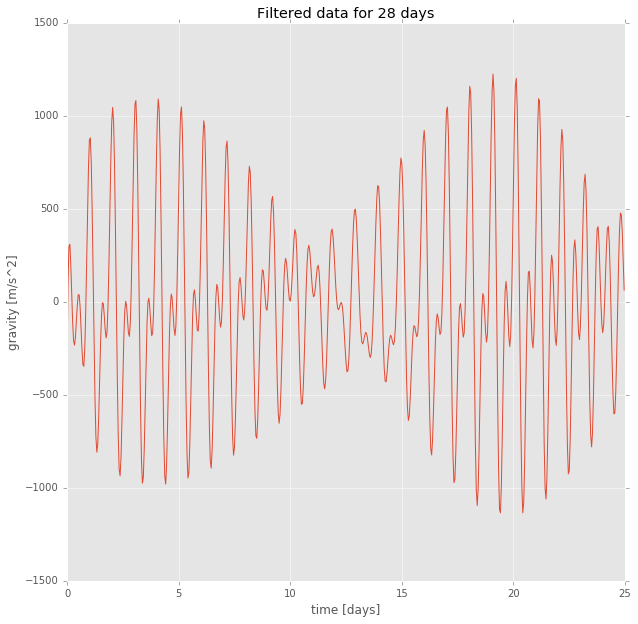

In [54]:
# Cell 4c - filtering the data
sfh = st.copy()
tfh = sfh[0]
ftfh = tfh.filter("highpass",freq=(0.9*fre[1]))
plt.plot(st[0].times()[0:600]/(3600*24),ftfh[0:600])
plt.title('Filtered data for 28 days')
plt.xlabel("time [days]")
plt.ylabel("gravity [m/s^2]")


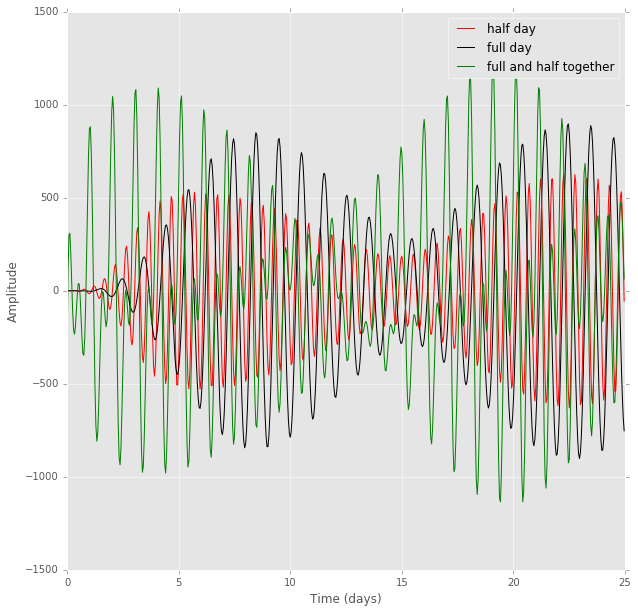

In [70]:
# Cell 4d - filtering the data

sh = st.copy()
sf = st.copy()

thh = sh[0]
tff = sf[0]

fthh = thh.filter("bandpass",freqmin=(0.9*(fre[0])) ,freqmax= (1.1*(fre[0])))
ftff = tff.filter("bandpass",freqmin=(0.9*(fre[1])) ,freqmax= (1.1*(fre[1])))


plt.plot(st[0].times()[0:600]/(3600*24),fthh[0:600],'r', label='half day')
plt.plot(st[0].times()[0:600]/(3600*24),ftff[0:600],'k', label='full day')
plt.plot(st[0].times()[0:600]/(3600*24),ftfh[0:600],'g', label='full and half together')
plt.ylabel('Amplitude')
plt.xlabel('Time (days)')
plt.legend()



## Answers to exercise 4
#### a) Why is the peak for the Chandler wobble not really visible in the spectrogram? 
The possible explanation that I can think of is that our data set is limited to around a year, whereas the Chandler wobble has a period of 433 days, much larger than the size of our data set. Therefore its period has not been captured well within our data, therefore the peak for the wobble is not really visible.

#### b)Which filter do you choose and why? Plot the filtered signal for about the first 28 days. Explain what happens behind the screens when applying a filter to data (in mathematical sense).
To separate the tides of half and full day I chose the high pass filter. A high pass filter would effectively remove all low frequency information, keeping only the higher frequencies in the filtered signal. Since we were interested in the half and full day tides, which were the highest frequency components compared to the other tidal signals, I applied a high pass filter, to keep all the high frequency components and filter out all the lower frequency signals.

When we apply a filter, we are effectively going from say the time domain to the frequency domain, where in we can chose what frequencies we want to select, the higher (high-pass) or lower (low-pass) or a particular band (band pass) with or without changing our amplitudes and then go back to the time domain. Say for example speaking of the low pass filter applied in the time domain, in an idealized scenario if we consider its impulse response to be a sinc function, then its convolution with our signal in the time domain is a multiplication in the frequency domain of its fourier transform, which is a box car function. Therefore only those frequency components in the rectangular window will remain all else will be multiplied by zero, and when we are back in the time domain we will have our low pass filtered signal.

#### c) Which filter do you choose this time and why? 
I chose a band pass filter, since I wanted to isolate the half and full day periods separately. We wanted both signals by themselves, therefore isolate a certain band from the entire signal, which is exactly what a bandpass filter does.

#### How can a filter be defined, in terms of responses? There are mainly three different keywords. Describe them. Why do we need three instead of only one definition?
We can define a filter via impulse response, step response or frequency response. An impulse response is the system's  output when presented with a brief input signal (impulse). A frequency response on the other hand is in the frequency domain.  It is the measure of the output spectrum of a system or device in response to a stimulus, in a way the frequency response for a physical system generally involves exciting the system with an input signal, measuring both input and output time histories, and comparing the two through a process such as the Fast Fourier Transform (FFT) (from wikipedia), however this pertains to the frequency domain. Similarly if the reponse of a system is described in parameters which are based on the time dependence of the response, then in the time domain that response is the step response. In other words, the impulse response and the step response are the outputs responses of the system in the time domain with the inputs being an impulse input and a heaviside step function respectively, and the frequency response describes the output response of the system in terms of magnitude and phase as a function of frequency, in comparison to the input.
We need three and not one, since together they better describe all the facets/properties of a filter across both time and frequency domains (filters can be applied on both domains). Using one to describe a filter will not be enough information.

___________________

## Exercise 5

In this question we are going to use a cross correlation technique to make a differential pick time. You are provided with two signals in the data directory: 

`data/seismogram_1.MSEED` <br>
`data/seismogram_2.MSEED`

seismogram_2.MSEED is noisy, and arrives later than seismogram_1.MSEED. We will use a cross-correlation with the better seismogram to make a more accurate pick of the arrival time on the noisy seismogram. 

For this question you should use the obspy function xcorr_pick_correction(). This is well documentated, and has good default plotting options. 

You are given these initial pick times. <br>
t1 = UTCDateTime(0.335)<br>
t2 = UTCDateTime(0.55)

a) Read in the seismograms in Cell 5a. Use the function [xcorr_pick_correction](https://docs.obspy.org/packages/autogen/obspy.signal.cross_correlation.xcorr_pick_correction.html) to create a cross correlation. There is no need to filter the seismograms.  <br>
Plot the cross correlation. Display the Time correlation and Correlation coefficient.

b) What was the length of the time window you cross-correlated over? Why is this a good choice?  

c) Calculate the corrected differential pick time in Cell 5b. This is the time lag between the first arrival on seismogram 1 and on seismogram 2.

d) Write a short paragraph on what has been done here, and why it could be useful. 


BW.UH1..EHZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:00.845000Z | 200.0 Hz, 170 samples


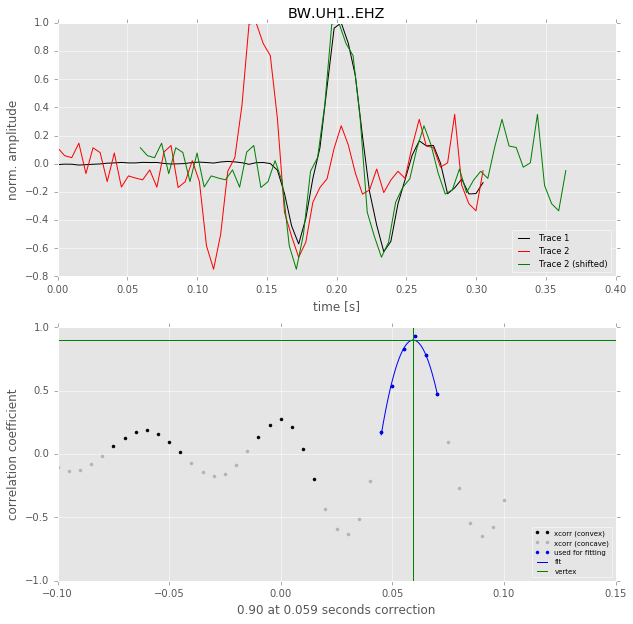

Correlation time is -0.059324528195098057
Correlation coefficient 0.89819529153589805


In [21]:
# Cell 5a - crosscorrelation
#reading in the seismograms
st1 = read("./data/seismogram_1.MSEED")
st2 = read("./data/seismogram_2.MSEED")
print(st1[0])
t1 = UTCDateTime(0.335)
t2 = UTCDateTime(0.55)
time, corr = xcorr_pick_correction(t1,st1[0],t2,st2[0],0.1,0.1,cc_maxlag= 0.10, filter=None, plot=True)
print ('Correlation time is %r' %time)
print ('Correlation coefficient %r' %corr)

In [23]:
# Cell 5b - differential pick times
diff_pick = (t2+time-t1)
print('Differential pick time is (in seconds) %r' %diff_pick)



Differential pick time is (in seconds) 0.155675


b) I chose the time to start cross correlation before pick time and after as 0.1 seconds. To keep a very narrow window to be able to discern the peaks distinctively, I tried with 0.05 for both t_before and t_after but there were not enough samples for the function to work effectively. I think it is a good choice to keep the window narrow to calculate our correlation coefficient for pick time, and not let the other signal affect our calculation of the coeffiecient.




d) We were dealing with two different seismograms from two different stations that are separated by a distance. The seismic waves pass through the first seismometer and then arrives at seismometer 2. Unfortunately due to a variety of reasons the second seismogram is noisy(noise induced by the seismometer itself, maybe due to the medium) and to make an accurate assesment of the differential pick time between these two stations we need to employ cross correlation techniques. This picture accurately represents a cross correlation.

<img style="float: left; height: 350px; padding: 10px" src="DATA/cc.jpg"/>

We take both signals in the time domain, and move one over the other in time steps, calculating the the correlation each step and trying to match the similarity in the two signals at each step. Thus despite the noise we are able to discern the accurate pick of the arrival time  of the noisy seismogram by matching it in a way the good seismogram, and once we have done that we can get the accurate time lag (differential pick) of the arrivals at seismogram 1 and 2.

________________

## Final bonus question

Between sound, tidal, and seismic/seismological data, what do you prefer to work on considering computational effort? Explain why.

### Answer to bonus question

In terms of considering computational effort, the less the number of samples we have to deal with the faster it is computationally. The nyquist frequency dictates the sampling rate one should ideally have. Its the half of our sampling rate, and should be the highest frequency in our signal. In terms of audio signals, the audible human range is between 20Hz-20KHz, therefore to keep nyquist frequency the maximum frequency in our data (say a recording of some form for humans), our sampling rate should be in KHz, which is a lot of samples per second and depending upon the duration of the signal a large total number of samples. The same goes for seismic data, high sampling rates to capture all aspects of the arriving waves and duration again large enough to capture the whole signal. For tidal data, it is generally associated with really long periods, therefore we do not have to sample as frequently however on the other side to fully capture an event (say the cycle of the orbit of the moon)  we might have to record the data for much longer periods of time as compared to audio or seismic data. But thinking purely in terms of computational effort, I think tidal data equals lesser samples than audio or seismic data therefore tidal data should be less computationally intensive as compared to seismic or audio(sound) data.